In [1]:
#일간 music 차트
from bs4 import BeautifulSoup
from urllib.request import urlopen

open_url = urlopen('http://www.mnet.com/chart/TOP100/20180314?pNum=1') # 요일차트 Top 100 페이지의 정보를 사용함.
open_url2 = urlopen('http://www.mnet.com/chart/TOP100/20180314?pNum=2')

soup = BeautifulSoup(open_url, 'html.parser')
soup2 = BeautifulSoup(open_url2, 'html.parser')

song_list = soup.find(class_='MMLTable jQMMLTable').table.tbody.find_all('tr')
#song_list

song_list2 = soup2.find(class_='MMLTable jQMMLTable').table.tbody.find_all('tr')
#song_list2
    
mnet_each_day=[]

for song in song_list: # 각 노래 정보 가져오기

    rank= song.find('span', class_='MMLI_RankNum').get_text().strip('위')

    if song.find('span', class_='MMLI_Updown').get_text() == '신규진입':
        num='0' 
    else:
        num= song.find('span', class_='MMLI_UpdownNum').get_text()
        
    num=num.replace('보합','0')
    num=num.replace('상승','')
    num=num.replace('하락','')
    
    song_name= song.find('a', class_='MMLI_Song').get_text()
    singer= song.find('a', class_='MMLIInfo_Artist').get_text()
    album= song.find('a', class_='MMLIInfo_Album').get_text()

    open_url3 = song.find('a')['href']
    open_url3 = urlopen('http://www.mnet.com' + open_url3)
    soup3 = BeautifulSoup(open_url3, 'html.parser')
    s_date= soup3.find('dd').find_all('p')[1].find(class_='right').get_text()
    s_date

    mnet_each_day.append([int(rank), num, song_name, singer, album, s_date])

for song in song_list2: # 엠넷은 1-50, 51-100 페이지를 따로 사용하므로 for문 한 번 더 사용

    rank= song.find('span', class_='MMLI_RankNum').get_text().strip('위')
    
    if song.find('span', class_='MMLI_Updown').get_text() == '신규진입':
        num='0' 
    else:
        num= song.find('span', class_='MMLI_UpdownNum').get_text()

    num=num.replace('보합','0')
    num=num.replace('상승','')
    num=num.replace('하락','')
    
    song_name= song.find('a', class_='MMLI_Song').get_text()
    singer= song.find('a', class_='MMLIInfo_Artist').get_text()
    album= song.find('a', class_='MMLIInfo_Album').get_text()

    open_url3 = song.find('a')['href']
    open_url3 = urlopen('http://www.mnet.com' + open_url3)
    soup3 = BeautifulSoup(open_url3, 'html.parser')
    s_date= soup3.find('dd').find_all('p')[1].find(class_='right').get_text()
    s_date


    mnet_each_day.append([int(rank), num, song_name, singer, album, s_date])

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHA

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


In [2]:
mnet_each_day[0:10]

[[1, '0', '꽃 길', 'BIGBANG', '꽃 길', '2018.03.13'],
 [2, '1', '별이 빛나는 밤', '마마무(Mamamoo)', 'Yellow Flower', '2018.03.07'],
 [3, '1', 'Look', 'GOT7 (갓세븐)', 'Eyes On You', '2018.03.12'],
 [4, '0', 'Jenga (Feat. Gaeko)', '헤이즈(Heize)', '바람', '2018.03.08'],
 [5, '0', '내가 더 나빠', '헤이즈(Heize)', '바람', '2018.03.08'],
 [6, '0', 'You', '멜로망스(Melomance)', '투유 프로젝트 - 슈가맨2 Part 2', '2018.01.22'],
 [7, '14', 'My Blossom', '소유(SOYOU)', 'My Blossom', '2018.03.12'],
 [8,
  '4',
  '약속해요 (I.P.U.)',
  'Wanna One(워너원)',
  '약속해요 (I.P.U.) - Special Theme Track',
  '2018.03.05'],
 [9, '0', '나타나줘 (Feat. 박재범)', '로꼬', '나타나줘', '2018.03.14'],
 [10, '3', '괜찮냐고 ', '헤이즈(Heize)', '바람', '2018.03.08']]

In [3]:
import pandas as pd

#요일 차트 정보를 데이터 프레임으로 만든다.
df = pd.DataFrame(mnet_each_day, columns=['mnet_순위','mnet_등락','mnet_곡','mnet_가수','mnet_앨범','mnet_발매일'])

#csv 파일로 저장한다.
df.to_csv('../../data/mnet_song.csv', sep=',', encoding='utf-8', index=False)

In [4]:
df.head()

,mnet_순위,mnet_등락,mnet_곡,mnet_가수,mnet_앨범,mnet_발매일
0,1,0,꽃 길,BIGBANG,꽃 길,2018.03.13
1,2,1,별이 빛나는 밤,마마무(Mamamoo),Yellow Flower,2018.03.07
2,3,1,Look,GOT7 (갓세븐),Eyes On You,2018.03.12
3,4,0,Jenga (Feat. Gaeko),헤이즈(Heize),바람,2018.03.08
4,5,0,내가 더 나빠,헤이즈(Heize),바람,2018.03.08


In [5]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

page = urlopen('http://www.mnet.com/mv/top/20180314?pNum=1&view=2') #동영상 Top 100 페이지 정보를 사용.
page2 = urlopen('http://www.mnet.com/mv/top/20180314?pNum=2&view=2')

soup_mv = BeautifulSoup(page, 'html.parser')
soup_mv2 = BeautifulSoup(page2, 'html.parser')

song_list = soup_mv.find(class_='list_review').find('ul').find_all('li')
#song_list

song_list2 = soup_mv2.find(class_='list_review').find('ul').find_all('li')
#song_list2

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.
Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


In [6]:
mnet_mv=[]

for song in song_list: # 각 동영상의 정보를 가져온다.
    
    rank=song.find('span', class_='rank').get_text()
    singer= song.find('span', class_='actor2').get_text()
    song_name= song.find('a', class_='ellipsis').get_text()
    
    if song.find('em').get_text() == '|':
        rating = '0'
    else:
        rating= song.find('em', class_='gic').get_text().strip('시청등급 ')

    rating=rating.replace('all','0')
    
    mnet_mv.append([int(rank), singer, song_name, int(rating)])
    
    print('MV순위: ', rank)
    print('MV가수: ', singer)
    print('MV곡: ', song_name)
    print('MV시청등급: ', rating)
    print()
    
for song in song_list2:
    
    rank=song.find('span', class_='rank').get_text()
    singer= song.find('span', class_='actor2').get_text()
    song_name= song.find('a', class_='ellipsis').get_text()
    
    if song.find('em').get_text() == '|':
        rating = '0'
    else:
        rating= song.find('em', class_='gic').get_text().strip('시청등급 ')
    
    rating=rating.replace('all','0')
    
    mnet_mv.append([int(rank), singer, song_name, int(rating)])
    
    print('MV순위: ', rank)
    print('MV가수: ', singer)
    print('MV곡: ', song_name)
    print('MV시청등급: ', rating)
    print()

MV순위:  1
MV가수:  마마무(Mamamoo)
MV곡:  별이 빛나는 밤
MV시청등급:  15

MV순위:  2
MV가수:  모모랜드(MOMOLAND)
MV곡:  뿜뿜
MV시청등급:  12

MV순위:  3
MV가수:  Wanna One(워너원)
MV곡:  약속해요 (I.P.U.)
MV시청등급:  0

MV순위:  4
MV가수:  GOT7 (갓세븐)
MV곡:  Look
MV시청등급:  12

MV순위:  5
MV가수:  헤이즈(Heize)
MV곡:  Jenga (Feat. Gaeko)
MV시청등급:  15

MV순위:  6
MV가수:  iKON
MV곡:  사랑을 했다 (LOVE SCENARIO)
MV시청등급:  12

MV순위:  7
MV가수:  Red Velvet (레드벨벳)
MV곡:  Bad Boy
MV시청등급:  12

MV순위:  8
MV가수:  청하
MV곡:  Roller Coaster
MV시청등급:  12

MV순위:  9
MV가수:  헤이즈(Heize)
MV곡:  MIANHAE
MV시청등급:  15

MV순위:  10
MV가수:  NCT U
MV곡:  BOSS
MV시청등급:  15

MV순위:  11
MV가수:  TWICE(트와이스)
MV곡:  Heart Shaker
MV시청등급:  12

MV순위:  12
MV가수:  NCT 127
MV곡:  TOUCH
MV시청등급:  12

MV순위:  13
MV가수:  포레스텔라
MV곡:  You Are My Star
MV시청등급:  0

MV순위:  14
MV가수:  TWICE(트와이스)
MV곡:  LIKEY
MV시청등급:  12

MV순위:  15
MV가수:  에이프릴(APRIL)
MV곡:  파랑새
MV시청등급:  12

MV순위:  16
MV가수:  헤이즈(Heize)
MV곡:  내가 더 나빠
MV시청등급:  12

MV순위:  17
MV가수:  Junoflo(주노플로)
MV곡:  Grapevine (Feat. Jay Park)
MV시청등급:  12

MV순위:  18
MV가수:  김영철
MV곡: 

In [7]:
import pandas as pd

# 동영상 차트의 정보를 데이터 프레임화 한다.
df_mv=pd.DataFrame(mnet_mv, columns=['MV순위','mnet_가수','mnet_곡','mnet_MV시청등급'])
df_mv.head()

,MV순위,mnet_가수,mnet_곡,mnet_MV시청등급
0,1,마마무(Mamamoo),별이 빛나는 밤,15
1,2,모모랜드(MOMOLAND),뿜뿜,12
2,3,Wanna One(워너원),약속해요 (I.P.U.),0
3,4,GOT7 (갓세븐),Look,12
4,5,헤이즈(Heize),Jenga (Feat. Gaeko),15


In [8]:
# csv에서 노래 정보를 가지고 옴
song_chart= pd.read_csv('../../data/mnet_song.csv', thousands=',', encoding='utf-8')
song_chart.head()

,mnet_순위,mnet_등락,mnet_곡,mnet_가수,mnet_앨범,mnet_발매일
0,1,0,꽃 길,BIGBANG,꽃 길,2018.03.13
1,2,1,별이 빛나는 밤,마마무(Mamamoo),Yellow Flower,2018.03.07
2,3,1,Look,GOT7 (갓세븐),Eyes On You,2018.03.12
3,4,0,Jenga (Feat. Gaeko),헤이즈(Heize),바람,2018.03.08
4,5,0,내가 더 나빠,헤이즈(Heize),바람,2018.03.08


In [9]:
#노래 차트 정보를 담은 데이터 프레임
song_chart_frame=pd.DataFrame(song_chart, columns=['mnet_순위','mnet_등락','mnet_곡','mnet_가수','mnet_앨범','mnet_발매일'])
song_chart_frame.head()

,mnet_순위,mnet_등락,mnet_곡,mnet_가수,mnet_앨범,mnet_발매일
0,1,0,꽃 길,BIGBANG,꽃 길,2018.03.13
1,2,1,별이 빛나는 밤,마마무(Mamamoo),Yellow Flower,2018.03.07
2,3,1,Look,GOT7 (갓세븐),Eyes On You,2018.03.12
3,4,0,Jenga (Feat. Gaeko),헤이즈(Heize),바람,2018.03.08
4,5,0,내가 더 나빠,헤이즈(Heize),바람,2018.03.08


In [10]:
#노래 차트와 동영상 차트를 곡 이름을 기준으로 합친다.
data_result=pd.merge(song_chart_frame, df_mv, on='mnet_곡')
data_result.head()

,mnet_순위,mnet_등락,mnet_곡,mnet_가수_x,mnet_앨범,mnet_발매일,MV순위,mnet_가수_y,mnet_MV시청등급
0,2,1,별이 빛나는 밤,마마무(Mamamoo),Yellow Flower,2018.03.07,1,마마무(Mamamoo),15
1,3,1,Look,GOT7 (갓세븐),Eyes On You,2018.03.12,4,GOT7 (갓세븐),12
2,4,0,Jenga (Feat. Gaeko),헤이즈(Heize),바람,2018.03.08,5,헤이즈(Heize),15
3,5,0,내가 더 나빠,헤이즈(Heize),바람,2018.03.08,16,헤이즈(Heize),12
4,8,4,약속해요 (I.P.U.),Wanna One(워너원),약속해요 (I.P.U.) - Special Theme Track,2018.03.05,3,Wanna One(워너원),0


In [11]:
import numpy as np

np.corrcoef(data_result['mnet_순위'], data_result['MV순위'])
# 요일 차트에서의 곡 순위와 동영상 차트의 순위는 관계가 있다.

array([[1.        , 0.45303848],
       [0.45303848, 1.        ]])

In [12]:
import platform #os 정보를 가져 올 수 있는 모듈
from matplotlib import font_manager, rc
# font_manager : 폰트 관리 모듈, rc : 폰트 변경 모듈
from matplotlib import pyplot as plt # 시각화 도구
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False # 유니코드 표현 설정하기
if platform.system() == 'Darwin':
 rc('font', family='AppleGothic') # OS가 APPLE(Darwin)이면 AppleGothic으로 폰트 설정
elif platform.system() == 'Windows':
 path="c:/Windows/Fonts/malgun.ttf" #OS가 윈도우즈면 맑은 고딕으로 설정
 font_name = font_manager.FontProperties(fname=path).get_name()
 rc('font', family=font_name)
else:
 print('Unknown System... sorry~~~~')

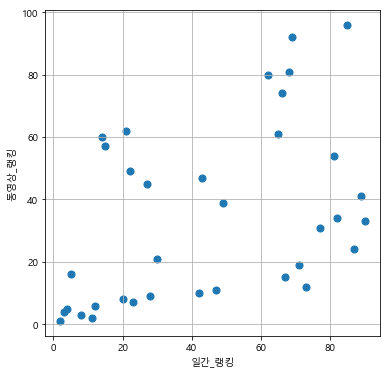

In [13]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['mnet_순위'], data_result['MV순위'],s=50)
plt.xlabel('일간_랭킹')
plt.ylabel('동영상_랭킹')
plt.grid()
plt.show()

In [14]:
fp1 = np.polyfit(data_result['mnet_순위'], data_result['MV순위'], 1) 
fp1

array([ 0.4271464 , 15.52874046])

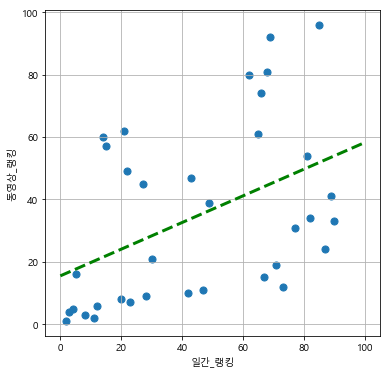

In [15]:
f1 = np.poly1d(fp1) 
fx = np.linspace(0,100,100)

plt.figure(figsize=(6,6))
plt.scatter(data_result['mnet_순위'], data_result['MV순위'],s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('일간_랭킹')
plt.ylabel('동영상_랭킹')
plt.grid()
plt.show()

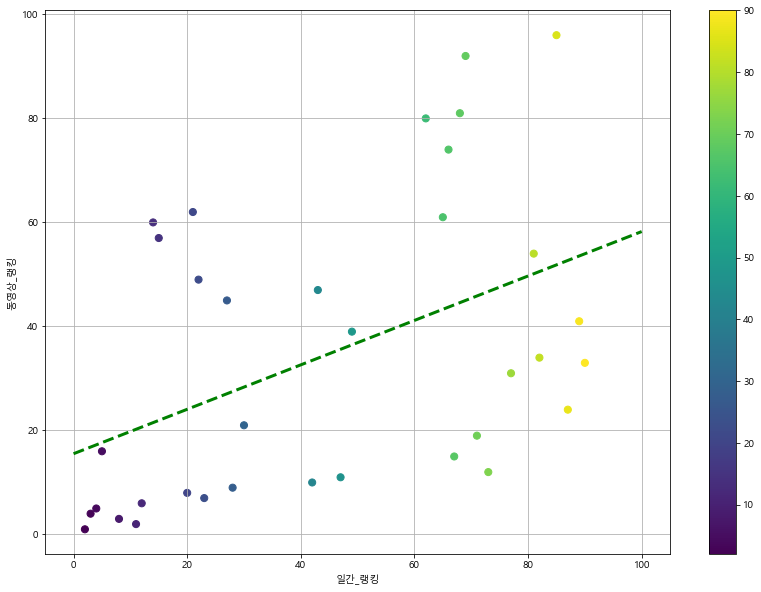

In [16]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['mnet_순위'], data_result['MV순위'],c=data_result['mnet_순위'], s=50) 
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g') 
#오차가 가장 큰 10개의 구에 대해서 텍스트 부여하기 
# for n in range(10):     
#     plt.text(bugs['순위'][n]*1.02,  bugs['bugs_mv_순위'][n] * 0.98, bugs.index[n], fontsize=15)  

plt.xlabel('일간_랭킹')
plt.ylabel('동영상_랭킹')
plt.colorbar() 
plt.grid()
plt.show()